In [1]:
# Part 4 of presentation for Kariera IT conference in Wrocław, Poland (06-10-2018).
# Copyright: Szymon Moliński, Data Lions
# More about the analysis: https://medium.com/@s.molinski/upa%C5%82y-a-sprawa-polska-c1abd19a9e72 (PL)

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('monthly_lst_measurements_wroclaw.csv')

In [4]:
df.head()

,FILENAME,ACQUISITION TIME,DAY OR NIGHT,MIN TEMPERATURE,MAX TEMPERATURE,MEAN TEMPERATURE,STD OF TEMPERATURE
0,clipped_night_MOD11B3.A2010001.h19v03.006.2016...,2010-01-01,night,252.000000,259.799988,256.384003,1.836433
1,clipped_day_MOD11B3.A2010001.h19v03.006.201603...,2010-01-01,day,256.880005,262.940002,259.972015,1.434151
2,clipped_day_MOD11B3.A2010032.h19v03.006.201603...,2010-02-01,day,269.859985,273.660004,272.177338,0.903117
3,clipped_day_MOD11B3.A2010060.h19v03.006.201603...,2010-03-01,day,278.019989,285.119995,281.660461,1.384315
4,clipped_day_MOD11B3.A2010091.h19v03.006.201603...,2010-04-01,day,287.940002,294.119995,291.604858,1.136992


In [5]:
# Sort data
sorted_df = df.sort_values(['ACQUISITION TIME', 'DAY OR NIGHT'])

In [6]:
sorted_df.head()

,FILENAME,ACQUISITION TIME,DAY OR NIGHT,MIN TEMPERATURE,MAX TEMPERATURE,MEAN TEMPERATURE,STD OF TEMPERATURE
381,clipped_day_MYD11B3.A2002182.h19v03.006.201516...,2002-07-01,day,301.399994,310.059998,304.895966,1.721879
364,clipped_night_MYD11B3.A2002182.h19v03.006.2015...,2002-07-01,night,285.579987,290.040009,286.619537,1.022933
382,clipped_day_MYD11B3.A2002213.h19v03.006.201516...,2002-08-01,day,299.399994,305.199982,302.638641,1.274399
365,clipped_night_MYD11B3.A2002213.h19v03.006.2015...,2002-08-01,night,285.339996,289.759979,287.296417,0.862733
383,clipped_day_MYD11B3.A2002244.h19v03.006.201516...,2002-09-01,day,291.600006,297.940002,295.381775,1.531286


In [7]:
# Delete all corrupted values

def get_year(s):
    year = s[:4]
    return int(year)

def get_month(s):
    month = s[5:7]
    return int(month)
    

processed_df = sorted_df[sorted_df['MIN TEMPERATURE'] > 0]
processed_df = processed_df[processed_df.FILENAME != '-1']
years_series = processed_df.apply(lambda val: get_year(val['ACQUISITION TIME']), axis = 1)
years_series.name = 'YEARS'
months_series = processed_df.apply(lambda val: get_month(val['ACQUISITION TIME']), axis = 1)
months_series.name = 'MONTHS'
full_df = pd.concat([processed_df, years_series, months_series], axis=1)
full_df = full_df.sort_values(['ACQUISITION TIME', 'DAY OR NIGHT'])
full_df.head()

,FILENAME,ACQUISITION TIME,DAY OR NIGHT,MIN TEMPERATURE,MAX TEMPERATURE,MEAN TEMPERATURE,STD OF TEMPERATURE,YEARS,MONTHS
381,clipped_day_MYD11B3.A2002182.h19v03.006.201516...,2002-07-01,day,301.399994,310.059998,304.895966,1.721879,2002,7
364,clipped_night_MYD11B3.A2002182.h19v03.006.2015...,2002-07-01,night,285.579987,290.040009,286.619537,1.022933,2002,7
382,clipped_day_MYD11B3.A2002213.h19v03.006.201516...,2002-08-01,day,299.399994,305.199982,302.638641,1.274399,2002,8
365,clipped_night_MYD11B3.A2002213.h19v03.006.2015...,2002-08-01,night,285.339996,289.759979,287.296417,0.862733,2002,8
383,clipped_day_MYD11B3.A2002244.h19v03.006.201516...,2002-09-01,day,291.600006,297.940002,295.381775,1.531286,2002,9


In [8]:
# Plot temperature indexes over time

def celsius(k):
    c = k - 273.15
    return c

p_mean = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "MEAN TEMPERATURE")
p_mean = p_mean.apply(lambda x: celsius(x))
p_min = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "MIN TEMPERATURE")
p_min = p_min.apply(lambda x: celsius(x))
p_max = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "MAX TEMPERATURE")
p_max = p_max.apply(lambda x: celsius(x))
p_std = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "STD OF TEMPERATURE")

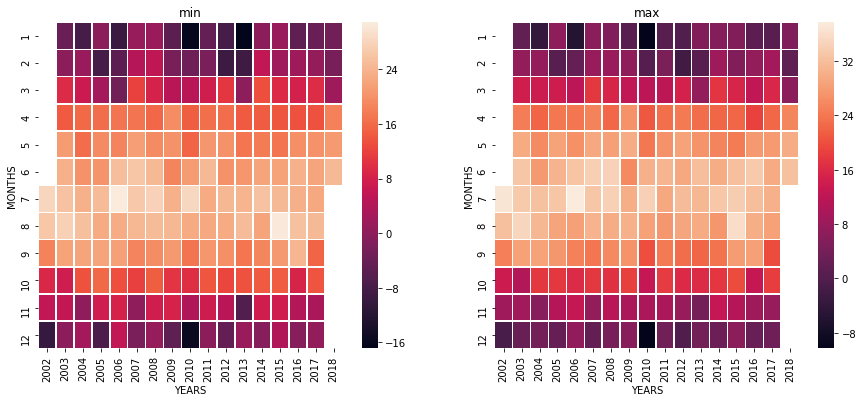

In [9]:
f1, (ax_min, ax_max) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.heatmap(p_min, linewidths=.5, ax=ax_min)
ax_min.set_title('min')
sns.heatmap(p_max, linewidths=.5, ax=ax_max)
ax_max.set_title('max')
# f1.savefig('minmax.png')
plt.show()

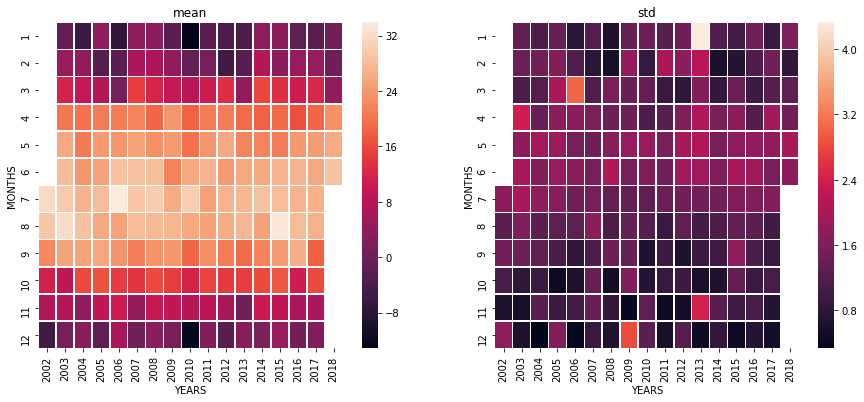

In [10]:
f2, (ax_mean, ax_std) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.heatmap(p_mean, linewidths=.5, ax=ax_mean)
ax_mean.set_title('mean')
sns.heatmap(p_std, linewidths=.5, ax=ax_std)
ax_std.set_title('std')
# f2.savefig('meanstd.png')
plt.show()

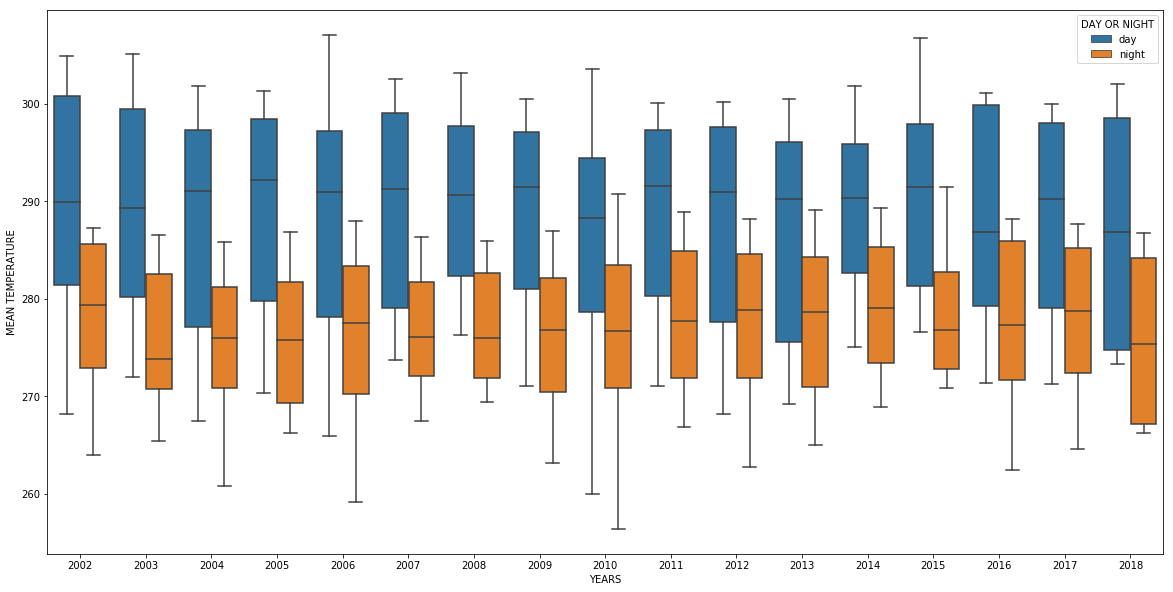

In [11]:
fig3 = plt.figure(figsize=(20, 10))
ax_boxplot = sns.boxplot(data = full_df,
                        x = 'YEARS',
                        y = 'MEAN TEMPERATURE',
                        hue = 'DAY OR NIGHT')
# fig3.savefig('dziennoc.png')

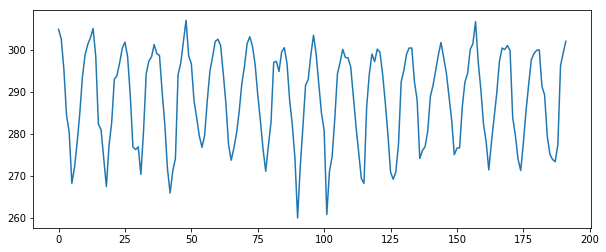

In [12]:
f3, ax = plt.subplots(figsize=(10, 4))
ax.plot((full_df['MEAN TEMPERATURE'][full_df['DAY OR NIGHT'] == 'day']).values)
# f3.savefig('dzien.png')
plt.show()

In [13]:
# Mean temperature for each year

mean_series_day = full_df[full_df['DAY OR NIGHT'] == 'day'].groupby(by='YEARS')['MEAN TEMPERATURE'].mean()
mean_series_night = full_df[full_df['DAY OR NIGHT'] == 'night'].groupby(by='YEARS')['MEAN TEMPERATURE'].mean()

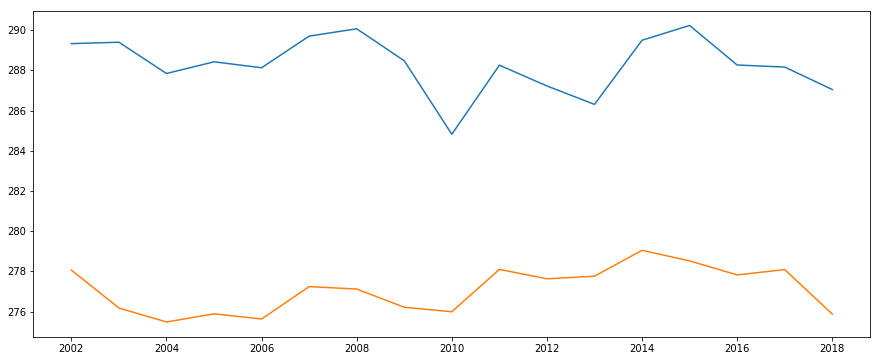

In [14]:
f4, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_series_day)
ax.plot(mean_series_night)
# f4.savefig('mean_series_wrong.png')
plt.show()

In [15]:
def trend(time_series, order=1):
    coeffs = np.polyfit(time_series.index.values, list(time_series), order)
    slope = coeffs[-2]
    return float(slope)

day_trend = trend(mean_series_day)
night_trend = trend(mean_series_night)

print(day_trend, night_trend)

-0.06361095578062308 0.10106860266790835


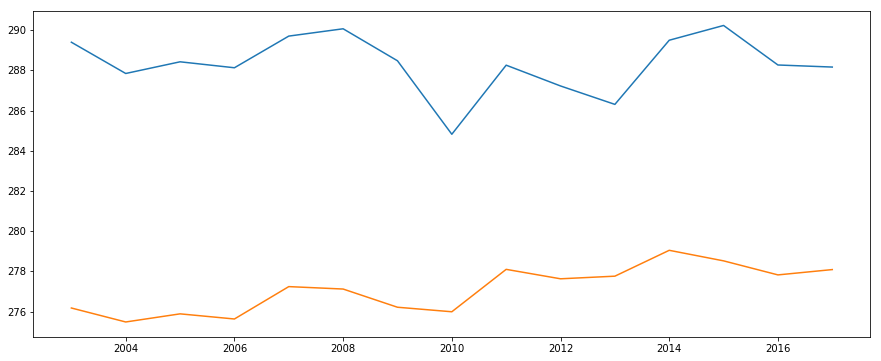

-0.027477818443662684 0.20975133805047758


In [16]:
f5, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_series_day[1:-1])
ax.plot(mean_series_night[1:-1])
plt.show()

day_trend = trend(mean_series_day[1:-1])
night_trend = trend(mean_series_night[1:-1])

print(day_trend, night_trend)